In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
# import hvplot.pandas


#from tensorflow.keras.callbacks import ModelCheckpoint
#import tensorflow as tf
#import os

In [22]:
#  Import beer data
beer_df = pd.read_csv("csv_files/beer_data_set.csv")
beer_df

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,Red Nose Winter Ale,696,Winter Warmer,17,Natty Greene's Pub & Brewing Co.,Notes:,6.8,3.59,35,50,...,44,24,19,52,21,0,26,21,96,77
5554,Our Special Ale 2019 (Anchor Christmas Ale),697,Winter Warmer,17,Anchor Brewing Company,Notes:This is the forty-fifth annual Our Speci...,6.9,3.79,35,50,...,73,9,58,87,23,0,48,91,44,104
5555,Fish Tale Winterfish,698,Winter Warmer,17,Fish Brewing Company / Fishbowl Brewpub,Notes:,7.5,3.76,35,50,...,36,50,70,72,59,0,81,110,18,73
5556,"He'Brew Hanukkah, Chanukah: Pass The Beer",699,Winter Warmer,17,Shmaltz Brewing Company,Notes:Chanukah Beer pours a rich crystal clear...,8.0,3.61,35,50,...,64,30,57,78,15,1,28,57,23,129


In [23]:
beer_df.isnull().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [24]:
beer_df = beer_df.dropna(how='any', axis=0)

In [25]:
beer_df.describe()

#beer_df = beer_df.replace({np.nan: None})

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2779.437725,64.447444,6.634948,3.760481,20.719762,38.461663,15.941505,42.752880,15.978402,34.322174,53.630490,34.619330,1.314435,39.386609,38.421166,17.588553,68.599172
std,1604.852085,35.820549,2.521077,0.442848,13.736485,22.181782,11.625370,28.592263,18.270748,27.121062,35.867233,39.854361,3.874765,36.655173,31.916471,23.976975,44.604752
min,1.000000,2.000000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1389.750000,34.000000,5.000000,3.590000,10.000000,25.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,2779.500000,64.000000,6.000000,3.820000,20.000000,35.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,4169.250000,95.000000,7.900000,4.040000,25.000000,45.000000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,62.000000,56.000000,22.000000,99.000000
max,5558.000000,126.000000,57.500000,4.830000,65.000000,100.000000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


In [ ]:
beer_df.head()

In [ ]:
beer_df.info()

In [21]:
beer_df.shape

(5556, 21)

In [10]:
beer_df.size

116676

In [11]:
beer_df.nunique()

Name           5317
key            5556
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64

In [12]:
beer_df.columns

Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')

In [13]:
beer_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5553    False
5554    False
5555    False
5556    False
5557    False
Length: 5556, dtype: bool

In [14]:
beer_df.corr()

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,1.000000,0.999833,0.084243,0.147367,-0.117267,-0.013783,0.094758,0.038093,0.145769,-0.165440,0.061583,0.321960,0.136194,0.225227,-0.236851,0.083272,-0.119740
Style Key,0.999833,1.000000,0.082113,0.147624,-0.116792,-0.014519,0.099340,0.036274,0.143499,-0.163292,0.060533,0.326229,0.137542,0.228106,-0.232587,0.081524,-0.122611
ABV,0.084243,0.082113,1.000000,0.397471,0.421231,0.474879,-0.176353,0.241098,0.619364,0.078711,0.401794,0.021340,-0.128662,0.187777,-0.065239,0.186708,0.187224
Ave Rating,0.147367,0.147624,0.397471,1.000000,0.316414,0.308921,0.122845,0.303817,0.206597,0.217573,0.291402,0.280714,0.007892,0.346698,0.085769,0.163685,0.166500
Min IBU,-0.117267,-0.116792,0.421231,0.316414,1.000000,0.855839,-0.031406,0.329700,0.324758,0.527708,0.249087,-0.085694,-0.074473,0.096039,0.411686,-0.024572,0.305144
Max IBU,-0.013783,-0.014519,0.474879,0.308921,0.855839,1.000000,-0.062652,0.311106,0.380511,0.477158,0.280077,-0.069518,-0.107054,0.166409,0.364750,0.072652,0.304672
Astringency,0.094758,0.099340,-0.176353,0.122845,-0.031406,-0.062652,1.000000,0.047032,-0.085812,0.204681,0.126852,0.646105,0.296618,0.486580,0.409541,-0.026283,0.019958
Body,0.038093,0.036274,0.241098,0.303817,0.329700,0.311106,0.047032,1.000000,0.353054,0.571140,0.555898,-0.058613,-0.050882,0.029468,0.149688,0.252435,0.797219
Alcohol,0.145769,0.143499,0.619364,0.206597,0.324758,0.380511,-0.085812,0.353054,1.000000,0.092425,0.536596,0.034752,-0.068130,0.208741,-0.023937,0.301358,0.385529
Bitter,-0.165440,-0.163292,0.078711,0.217573,0.527708,0.477158,0.204681,0.571140,0.092425,1.000000,0.207292,-0.061445,-0.022778,0.043897,0.725497,-0.000595,0.581136


In [15]:
beer_df.dtypes

Name            object
key              int64
Style           object
Style Key        int64
Brewery         object
Description     object
ABV            float64
Ave Rating     float64
Min IBU          int64
Max IBU          int64
Astringency      int64
Body             int64
Alcohol          int64
Bitter           int64
Sweet            int64
Sour             int64
Salty            int64
Fruits           int64
Hoppy            int64
Spices           int64
Malty            int64
dtype: object

<AxesSubplot:>

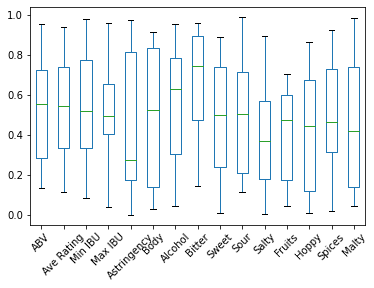

In [54]:
beer_df2 = pd.DataFrame(data = np.random.random(size=(15,15)), columns = ['ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'])
beer_df2.boxplot(grid=False, rot=45, fontsize=10)

In [1]:
beer_df2

NameError: name 'beer_df2' is not defined